In [1]:
import pandas as pd
import numpy as np
import dask.dataframe as dd
import matplotlib.pyplot as plt
%matplotlib inline
import os 

# Reading csv

In [2]:
#reading the file 
# Provide the correct file path for your CSV file
file_path = r"C:\Users\jonat\OneDrive\Jupyter notebook\UA library\Health insurance by age range and disability - Sheet1.csv"

# Read the CSV file
file1 = pd.read_csv(file_path)
file1.head()

,Label (Grouping),Total:,Under 19 years:,With a disability:,With health insurance coverage:,With private health insurance coverage,With public health coverage,No health insurance coverage,No disability:,With health insurance coverage:.1,...,With a disability:.2,With health insurance coverage:.4,With private health insurance coverage.4,With public health coverage.4,No health insurance coverage.4,No disability:.2,With health insurance coverage:.5,With private health insurance coverage.5,With public health coverage.5,No health insurance coverage.5
0,Alabama!!Estimate,"4,988,625","1,182,663","64,846","63,382","27,185","40,777","1,464","1,117,817","1,082,053",...,"341,742","341,036","184,936","336,644",706,"548,156","545,335","332,367","527,907","2,821"
1,Alaska!!Estimate,"701,511","183,084","8,092","7,685","4,502","4,373",407,"174,992","160,008",...,"33,928","33,722","18,853","33,218",206,"66,057","64,883","44,794","60,813","1,174"
2,Arizona!!Estimate,"7,251,924","1,683,061","86,850","81,295","42,474","48,893","5,555","1,596,211","1,460,012",...,"434,713","431,582","215,359","425,340","3,131","927,485","918,455","481,293","880,678","9,030"
3,Arkansas!!Estimate,"2,991,199","739,713","49,246","46,904","16,358","35,693","2,342","690,467","648,975",...,"209,557","209,133","103,125","207,617",424,"313,575","311,578","175,266","302,398","1,997"
4,California!!Estimate,"38,548,670","9,016,549","373,663","363,444","175,389","226,480","10,219","8,642,886","8,365,704",...,"2,024,775","2,005,543","856,988","1,961,760","19,232","4,030,046","3,981,504","2,035,778","3,724,912","48,542"


# Deleting "!!Estimate" 

In [3]:
# Replace the substring "!!Estimate" with an empty string in all column names.
file1.columns = file1.columns.str.replace("!!Estimate", "")

# Remove the "!!Estimate" substring from the "Label (Grouping)" column
file1["Label (Grouping)"] = file1["Label (Grouping)"].str.replace("!!Estimate", "")

# Print the modified DataFrame
file1.head()


,Label (Grouping),Total:,Under 19 years:,With a disability:,With health insurance coverage:,With private health insurance coverage,With public health coverage,No health insurance coverage,No disability:,With health insurance coverage:.1,...,With a disability:.2,With health insurance coverage:.4,With private health insurance coverage.4,With public health coverage.4,No health insurance coverage.4,No disability:.2,With health insurance coverage:.5,With private health insurance coverage.5,With public health coverage.5,No health insurance coverage.5
0,Alabama,"4,988,625","1,182,663","64,846","63,382","27,185","40,777","1,464","1,117,817","1,082,053",...,"341,742","341,036","184,936","336,644",706,"548,156","545,335","332,367","527,907","2,821"
1,Alaska,"701,511","183,084","8,092","7,685","4,502","4,373",407,"174,992","160,008",...,"33,928","33,722","18,853","33,218",206,"66,057","64,883","44,794","60,813","1,174"
2,Arizona,"7,251,924","1,683,061","86,850","81,295","42,474","48,893","5,555","1,596,211","1,460,012",...,"434,713","431,582","215,359","425,340","3,131","927,485","918,455","481,293","880,678","9,030"
3,Arkansas,"2,991,199","739,713","49,246","46,904","16,358","35,693","2,342","690,467","648,975",...,"209,557","209,133","103,125","207,617",424,"313,575","311,578","175,266","302,398","1,997"
4,California,"38,548,670","9,016,549","373,663","363,444","175,389","226,480","10,219","8,642,886","8,365,704",...,"2,024,775","2,005,543","856,988","1,961,760","19,232","4,030,046","3,981,504","2,035,778","3,724,912","48,542"


In [4]:
file1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 35 columns):
 #   Column                                                    Non-Null Count  Dtype 
---  ------                                                    --------------  ----- 
 0   Label (Grouping)                                          52 non-null     object
 1   Total:                                                    52 non-null     object
 2       Under 19 years:                                       52 non-null     object
 3           With a disability:                                52 non-null     object
 4               With health insurance coverage:               52 non-null     object
 5                   With private health insurance coverage    52 non-null     object
 6                   With public health coverage               52 non-null     object
 7               No health insurance coverage                  52 non-null     object
 8           No disability:          

In [5]:
# Remove additional spacing from column names
file1.columns = file1.columns.str.strip()

# Print the modified DataFrame
print(file1.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 35 columns):
 #   Column                                    Non-Null Count  Dtype 
---  ------                                    --------------  ----- 
 0   Label (Grouping)                          52 non-null     object
 1   Total:                                    52 non-null     object
 2   Under 19 years:                           52 non-null     object
 3   With a disability:                        52 non-null     object
 4   With health insurance coverage:           52 non-null     object
 5   With private health insurance coverage    52 non-null     object
 6   With public health coverage               52 non-null     object
 7   No health insurance coverage              52 non-null     object
 8   No disability:                            52 non-null     object
 9   With health insurance coverage:.1         52 non-null     object
 10  With private health insurance coverage.1  52 non-nul

In [6]:
# Identify columns with string values (excluding the first column)
string_columns = file1.columns[1:][file1.iloc[:, 1:].applymap(lambda x: isinstance(x, str)).any()]

# Convert identified columns to float
file1[string_columns] = file1[string_columns].apply(lambda x: pd.to_numeric(x.str.replace(',', ''), errors='coerce'))

# Display the DataFrame with converted values
print(file1)

        Label (Grouping)    Total:  Under 19 years:  With a disability:  \
0                Alabama   4988625          1182663               64846   
1                 Alaska    701511           183084                8092   
2                Arizona   7251924          1683061               86850   
3               Arkansas   2991199           739713               49246   
4             California  38548670          9016549              373663   
5               Colorado   5742363          1285242               54111   
6            Connecticut   3582236           780597               41901   
7               Delaware   1005551           222571               10459   
8   District of Columbia    661425           134213                5795   
9                Florida  21904247          4540824              227933   
10               Georgia  10718050          2665201              144517   
11                Hawaii   1383700           311058               11527   
12                 Idaho 

In [7]:
print(file1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 35 columns):
 #   Column                                    Non-Null Count  Dtype 
---  ------                                    --------------  ----- 
 0   Label (Grouping)                          52 non-null     object
 1   Total:                                    52 non-null     int64 
 2   Under 19 years:                           52 non-null     int64 
 3   With a disability:                        52 non-null     int64 
 4   With health insurance coverage:           52 non-null     int64 
 5   With private health insurance coverage    52 non-null     int64 
 6   With public health coverage               52 non-null     int64 
 7   No health insurance coverage              52 non-null     int64 
 8   No disability:                            52 non-null     int64 
 9   With health insurance coverage:.1         52 non-null     int64 
 10  With private health insurance coverage.1  52 non-nul

In [8]:
label= file1.groupby("Label (Grouping)")
type(label)

pandas.core.groupby.generic.DataFrameGroupBy

In [9]:
type(file1)

pandas.core.frame.DataFrame

In [10]:
AZ_label= label.get_group("Arizona")
AZ_label

,Label (Grouping),Total:,Under 19 years:,With a disability:,With health insurance coverage:,With private health insurance coverage,With public health coverage,No health insurance coverage,No disability:,With health insurance coverage:.1,...,With a disability:.2,With health insurance coverage:.4,With private health insurance coverage.4,With public health coverage.4,No health insurance coverage.4,No disability:.2,With health insurance coverage:.5,With private health insurance coverage.5,With public health coverage.5,No health insurance coverage.5
2,Arizona,7251924,1683061,86850,81295,42474,48893,5555,1596211,1460012,...,434713,431582,215359,425340,3131,927485,918455,481293,880678,9030


In [11]:
AZ_label["With a disability:"]. sum()

86850

In [12]:
# Assuming 'file1' is your DataFrame
# Replace 'file1' with your actual DataFrame name

# Find columns that contain "With a disability:"
disability_columns = [col for col in file1.columns if "With a disability:" in col]

# Group by "Label (Grouping)" and the identified disability columns
label2 = file1.groupby(["Label (Grouping)"] + disability_columns)

label2. size()


Label (Grouping)      With a disability:  With a disability:.1  With a disability:.2
Alabama               64846               434537                341742                  1
Alaska                8092                50835                 33928                   1
Arizona               86850               463351                434713                  1
Arkansas              49246               281546                209557                  1
California            373663              2128786               2024775                 1
Colorado              54111               347846                262539                  1
Connecticut           41901               212751                191793                  1
Delaware              10459               65624                 63051                   1
District of Columbia  5795                39533                 26898                   1
Florida               227933              1314993               1472802                 1
Georgia        

In [13]:
AZ_label2 = file1.loc[file1["Label (Grouping)"] == "Arizona", ["With a disability:", "With a disability:.1", "With a disability:.2"]].reset_index(drop=True)
print(AZ_label2)


   With a disability:  With a disability:.1  With a disability:.2
0               86850                463351                434713


In [14]:
# Assuming 'df' is your DataFrame
withdisability_cols = file1[['Label (Grouping)', 'Total:', 'Under 19 years:', 'With a disability:','19 to 64 years:', 
                          'With a disability:.1','65 years and over:', 'With a disability:.2']]
print(withdisability_cols)

        Label (Grouping)    Total:  Under 19 years:  With a disability:  \
0                Alabama   4988625          1182663               64846   
1                 Alaska    701511           183084                8092   
2                Arizona   7251924          1683061               86850   
3               Arkansas   2991199           739713               49246   
4             California  38548670          9016549              373663   
5               Colorado   5742363          1285242               54111   
6            Connecticut   3582236           780597               41901   
7               Delaware   1005551           222571               10459   
8   District of Columbia    661425           134213                5795   
9                Florida  21904247          4540824              227933   
10               Georgia  10718050          2665201              144517   
11                Hawaii   1383700           311058               11527   
12                 Idaho 

In [15]:
type (withdisability_cols)

pandas.core.frame.DataFrame

In [16]:
selected_rows = withdisability_cols[withdisability_cols['Label (Grouping)'].isin(['Arizona', 'California'])]
selected_rows

,Label (Grouping),Total:,Under 19 years:,With a disability:,19 to 64 years:,With a disability:.1,65 years and over:,With a disability:.2
2,Arizona,7251924,1683061,86850,4206665,463351,1362198,434713
4,California,38548670,9016549,373663,23477300,2128786,6054821,2024775


In [17]:
type(selected_rows)

pandas.core.frame.DataFrame

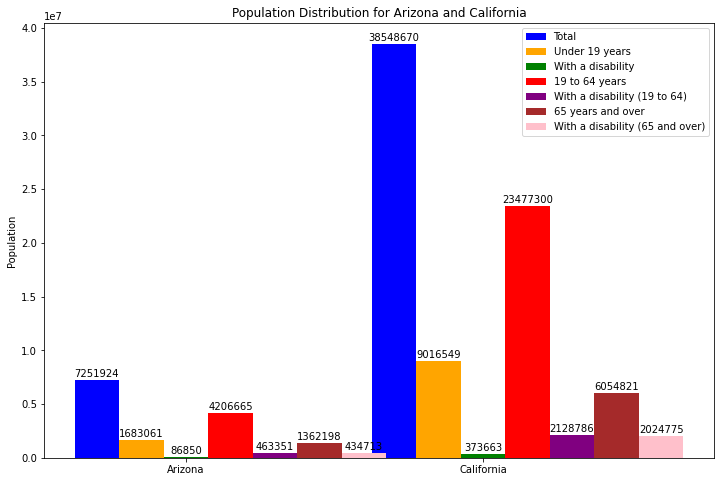

In [18]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Assuming "Label (Grouping)" is the index
selected_rows = withdisability_cols[withdisability_cols['Label (Grouping)'].isin(['Arizona', 'California'])]

# Extract relevant columns for the grouped bar chart
labels = selected_rows['Label (Grouping)']
total_values = selected_rows['Total:']
under_19_values = selected_rows['Under 19 years:']
with_disability_values = selected_rows['With a disability:']
years_19_64_values = selected_rows['19 to 64 years:']
with_disability_19_64_values = selected_rows['With a disability:.1']
years_65_over_values = selected_rows['65 years and over:']
with_disability_65_over_values = selected_rows['With a disability:.2']

# Set up positions for bars
bar_width = 0.15
bar_positions = np.arange(len(labels))

# Plotting the grouped bar chart
fig, ax = plt.subplots(figsize=(12, 8))

bars_total = ax.bar(bar_positions - 2*bar_width, total_values, bar_width, label='Total', color='blue')
bars_under_19 = ax.bar(bar_positions - bar_width, under_19_values, bar_width, label='Under 19 years', color='orange')
bars_with_disability = ax.bar(bar_positions, with_disability_values, bar_width, label='With a disability', color='green')
bars_19_64 = ax.bar(bar_positions + bar_width, years_19_64_values, bar_width, label='19 to 64 years', color='red')
bars_disability_19_64 = ax.bar(bar_positions + 2*bar_width, with_disability_19_64_values, bar_width, label='With a disability (19 to 64)', color='purple')
bars_65_over = ax.bar(bar_positions + 3*bar_width, years_65_over_values, bar_width, label='65 years and over', color='brown')
bars_disability_65_over = ax.bar(bar_positions + 4*bar_width, with_disability_65_over_values, bar_width, label='With a disability (65 and over)', color='pink')

# Adding data labels on top of the bars
for bars in [bars_total, bars_under_19, bars_with_disability, bars_19_64, bars_disability_19_64, bars_65_over, bars_disability_65_over]:
    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, yval + 100000, round(yval), ha='center', va='bottom')

# Adding labels, title, and legend
ax.set_ylabel('Population')
ax.set_title('Population Distribution for Arizona and California')
ax.set_xticks(bar_positions)
ax.set_xticklabels(labels)
ax.legend()

# Show the grouped bar chart
plt.show()


In [19]:
# Assuming selected_rows is the dataframe with the data

# Calculate percentages
percentage_under_19 = (selected_rows['With a disability:'] / selected_rows['Under 19 years:']) * 100
percentage_19_64 = (selected_rows['With a disability:.1'] / selected_rows['19 to 64 years:']) * 100
percentage_65_over = (selected_rows['With a disability:.2'] / selected_rows['65 years and over:']) * 100

# Create a new dataframe
percentage_AZ_CA = pd.DataFrame({
    'Label (Grouping)': selected_rows['Label (Grouping)'],
    'Percentage Under 19': percentage_under_19,
    'Percentage 19 to 64': percentage_19_64,
    'Percentage 65 and over': percentage_65_over
})

# Display the new dataframe
print(percentage_AZ_CA)


  Label (Grouping)  Percentage Under 19  Percentage 19 to 64  \
2          Arizona             5.160241            11.014687   
4       California             4.144191             9.067423   

   Percentage 65 and over  
2               31.912615  
4               33.440708  


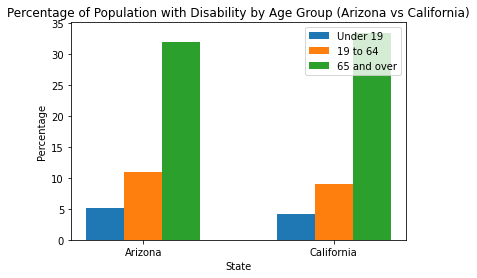

In [20]:
# import matplotlib.pyplot as plt

# Assuming percentage_AZ_CA is the dataframe with the calculated percentages

# Set the label and data
labels = percentage_AZ_CA['Label (Grouping)']
percentage_under_19 = percentage_AZ_CA['Percentage Under 19']
percentage_19_64 = percentage_AZ_CA['Percentage 19 to 64']
percentage_65_over = percentage_AZ_CA['Percentage 65 and over']

# Set the bar width
bar_width = 0.2

# Set the positions of bars on X-axis
r1 = range(len(labels))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

# Create bar graph
plt.bar(r1, percentage_under_19, width=bar_width, label='Under 19')
plt.bar(r2, percentage_19_64, width=bar_width, label='19 to 64')
plt.bar(r3, percentage_65_over, width=bar_width, label='65 and over')

# Set X-axis labels
plt.xlabel('State')
plt.xticks([r + bar_width for r in range(len(labels))], labels)

# Set Y-axis label
plt.ylabel('Percentage')

# Add legend
plt.legend()

# Set title
plt.title('Percentage of Population with Disability by Age Group (Arizona vs California)')

# Show the plot
plt.show()


In [21]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Assuming file1 is your dataframe with relevant columns for clustering
columns_for_clustering = file1[['Total:', 'Under 19 years:', 'With a disability:']]

# Data Preprocessing
columns_for_clustering = columns_for_clustering.apply(pd.to_numeric, errors='coerce')

# Handling missing values
columns_for_clustering.fillna(0, inplace=True)

# Scaling
scaler = StandardScaler()
scaled_data = scaler.fit_transform(columns_for_clustering)

# Manually assign regions based on the general knowledge of East and West states
east_states = ['Alabama', 'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Illinois', 'Indiana', 'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Mississippi', 'New Hampshire', 'New Jersey', 'New York', 'North Carolina', 'Ohio', 'Pennsylvania', 'Rhode Island', 'South Carolina', 'Tennessee', 'Vermont', 'Virginia', 'West Virginia']
file1['Region'] = 'West'
file1.loc[file1['Label (Grouping)'].isin(east_states), 'Region'] = 'East'

# Creating a new dataframe file2 with the added 'Region' column right next to 'Label (Grouping)'
file2 = file1[['Label (Grouping)', 'Region'] + list(file1.columns[:-2])]

# You can explore the data
print(file2)


        Label (Grouping) Region      Label (Grouping)    Total:  \
0                Alabama   East               Alabama   4988625   
1                 Alaska   West                Alaska    701511   
2                Arizona   West               Arizona   7251924   
3               Arkansas   West              Arkansas   2991199   
4             California   West            California  38548670   
5               Colorado   West              Colorado   5742363   
6            Connecticut   East           Connecticut   3582236   
7               Delaware   East              Delaware   1005551   
8   District of Columbia   West  District of Columbia    661425   
9                Florida   East               Florida  21904247   
10               Georgia   East               Georgia  10718050   
11                Hawaii   West                Hawaii   1383700   
12                 Idaho   West                 Idaho   1911951   
13              Illinois   East              Illinois  1241340

In [22]:
west_coast_data = file2[file2['Region'].isin(['West'])]
print(west_coast_data)

        Label (Grouping) Region      Label (Grouping)    Total:  \
1                 Alaska   West                Alaska    701511   
2                Arizona   West               Arizona   7251924   
3               Arkansas   West              Arkansas   2991199   
4             California   West            California  38548670   
5               Colorado   West              Colorado   5742363   
8   District of Columbia   West  District of Columbia    661425   
11                Hawaii   West                Hawaii   1383700   
12                 Idaho   West                 Idaho   1911951   
15                  Iowa   West                  Iowa   3153337   
16                Kansas   West                Kansas   2876222   
23             Minnesota   West             Minnesota   5657569   
25              Missouri   West              Missouri   6071333   
26               Montana   West               Montana   1104997   
27              Nebraska   West              Nebraska   193991

In [23]:
region_group=file2. groupby("Region")

In [24]:
region_group.size()

Region
East    26
West    26
dtype: int64

In [25]:
region_group.sum()

,Total:,Under 19 years:,With a disability:,With health insurance coverage:,With private health insurance coverage,With public health coverage,No health insurance coverage,No disability:,With health insurance coverage:.1,With private health insurance coverage.1,...,65 years and over:,With a disability:.2,With health insurance coverage:.4,With private health insurance coverage.4,With public health coverage.4,No health insurance coverage.4,No disability:.2,With health insurance coverage:.5,With private health insurance coverage.5,With public health coverage.5
Region,,,,,,,,,,,,,,,,,,,,,
East,186356677,42271548,2184601,2113810,1002213,1337443,70791,40086947,38283082,24716036,...,33677008,11036339,10973678,5761242,10796767,62661,22640669,22463659,13158708,21402391
West,145147940,35030664,1711062,1630804,782686,1017061,80258,33319602,31329850,20234452,...,23491945,8010798,7947799,3837336,7807758,62999,15481147,15321935,8341171,14563794


In [26]:
region_group.get_group("West")["With a disability:"].sum()

1711062

In [27]:
No_insurance= region_group[["No health insurance coverage", "No health insurance coverage.1", "No health insurance coverage.2"]].sum()
No_insurance

,No health insurance coverage,No health insurance coverage.1,No health insurance coverage.2
Region,,,
East,70791,1803865,1087790
West,80258,1989752,996530


In [28]:
type(No_insurance)

pandas.core.frame.DataFrame

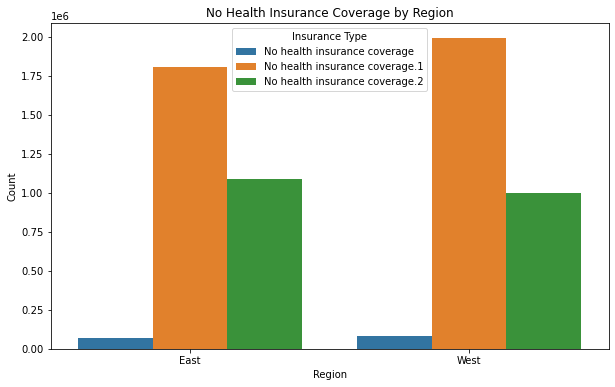

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming No_insurance is your DataFrame
# Reset the index to make 'Region' a column again
No_insurance.reset_index(inplace=True)

# Melt the DataFrame to make it suitable for Seaborn
No_insurance_melted = pd.melt(No_insurance, id_vars=['Region'], var_name='Insurance Type', value_name='Count')

# Create a bar plot using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Region', y='Count', hue='Insurance Type', data=No_insurance_melted)
plt.title('No Health Insurance Coverage by Region')
plt.show()
